Розробити програмний скрипт, що реалізує:
* Скоринговий аналіз позичальників за даними Data_description.xlsx, Sample_data.xlsx
* відповідно до моделі логістичної регресії
* Передбачити чи буде кредит повернено у форматі бінарної оцінки (0 або 1)
* Виявлення шахрайства та фальсифікації даних.

Очищення даних:
* Визначити наявні показники в даних sample_data.xlsx, видалити з data_description.xlsx тих, що не входять
* Визначити необхідні показники для оцінки кредитоспроможності, з data_description.xlsx
* Видалити непотрібні стовпці з sample_data.xlsx
* Видалити стовпці з пропусками, видалити їх у data_description.xlsx також
* Зберегти очищені дані в окремі файли

In [451]:
import pandas as pd

In [452]:
sample_data = pd.read_excel('./data/sample_data.xlsx')
sample_data

,Application,loan_amount,loan_days,applied_at,gender_id,Unnamed: 5,birth_date,Marital status,children_count_id,education_id,...,closed_at,product_profile_id,credit_policy_id,user_id,face_id,prolongation_number,prolongation_total_days,wizard_type_id,step,created_at
0,1,3000,30,2021-02-01 00:21:56,1,NaN,1995-02-03,2,1,5,...,2021-03-01 16:17:00,14,31,253430,NaN,NaN,NaN,2,3,2021-02-01 00:20:01
1,2,1000,7,2021-02-01 00:24:08,1,NaN,1984-01-19,2,2,4,...,2021-02-07 15:30:00,12,38,109618,NaN,NaN,NaN,2,3,2021-02-01 00:20:04
2,3,1000,3,2021-02-01 00:36:35,2,NaN,1994-08-02,2,1,4,...,2021-02-05 18:26:00,14,39,289130,NaN,NaN,NaN,5,7,2021-02-01 00:22:13
3,4,1600,30,2021-02-01 00:34:22,1,NaN,1992-11-12,1,1,3,...,2021-02-18 18:42:00,18,38,141625,226701.0,NaN,NaN,2,3,2021-02-01 00:22:15
4,5,2500,18,2021-02-01 23:22:57,2,NaN,1997-10-22,1,1,5,...,2021-05-23 18:29:00,14,39,204249,NaN,1.0,20.0,5,7,2021-02-01 00:23:03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,495,1000,15,2021-02-03 12:38:12,1,NaN,1967-01-02,4,3,5,...,2021-03-17 11:08:00,14,39,240569,NaN,1.0,30.0,5,7,2021-02-03 00:55:41
495,496,500,3,2021-02-03 01:38:14,2,NaN,1997-04-01,2,2,2,...,2021-02-03 01:59:00,14,39,290272,NaN,NaN,NaN,5,7,2021-02-03 01:23:54
496,497,2500,30,2021-02-03 01:48:53,2,NaN,1996-06-02,1,1,3,...,2021-02-17 17:02:00,14,31,199166,NaN,NaN,NaN,5,7,2021-02-03 01:43:13
497,498,1050,14,2021-02-03 02:08:05,1,NaN,1989-01-18,1,1,4,...,2021-03-04 19:37:00,14,31,228663,NaN,NaN,NaN,2,3,2021-02-03 01:51:31


In [453]:
data_description = pd.read_excel('./data/data_description.xlsx')
data_description

,Field_in_data,Description_of_information,Filling,At_the_time_of_the_request,Place_of_definition,Note
0,id,Ідентифікатор заявки,Обов'язково,Відомо,Визначається системою обліку заявок на момент ...,NaN
1,loan_amount,Сума кредита в заявці,Обов'язково,Відомо,Вказує позичальник,NaN
2,loan_days,Термін погашення кредита в заявці,Обов'язково,Відомо,Вказує позичальник,NaN
3,applied_at,Дата і час прийняття заявки,Обов'язково,Відомо,Визначається при подачі заявки,Локальний час на пристрої користувача або час ...
4,language,NaN,NaN,NaN,Визначається браузером при подачі заявки,Завжди UА
...,...,...,...,...,...,...
115,cardholder_name,Ім'я користувача на банківській картці,NaN,Відомо,NaN,NaN
116,face_id,"id обличчя, використовуємо сторонній сервіс дл...",NaN,???,NaN,NaN
117,step,номер кроку на якому зупинився клієнт при офор...,NaN,???,NaN,NaN
118,created_at,Дата і час створення заявки,Обов'язково,Відомо,Визначається при подачі заявки,Локальний час на пристрої користувача або час ...


In [454]:
labels = sample_data.columns
# видалити з data_description.xlsx ті рядки, де в Field_in_data немає нічого з labels
data_description = data_description[data_description['Field_in_data'].isin(labels)]
# видалити з sample_data.xlsx ті стовпці, які не входять в data_description
sample_data = sample_data[data_description['Field_in_data']]

In [455]:
# перевірка розмірів даних, чи співпадають кількість стовпців в sample_data та кількість рядків в data_description
print('Видалені стовпці, які не перетинаються між таблицями.')
print(f'Кількість стовпців в sample_data: {sample_data.shape[1]}')
print(f'Кількість рядків в data_description: {data_description.shape[0]}')

Видалені стовпці, які не перетинаються між таблицями.
Кількість стовпців в sample_data: 58
Кількість рядків в data_description: 58


In [456]:
# вибір стовпців, що будуть використовуватись для оцінки кредитоспроможності
data_description = data_description[data_description['Place_of_definition'].isin(['Вказує позичальник', 'параметри, повязані з виданим продуктом'])]
# видалити з sample_data.xlsx ті стовпці, які не входять в data_description
sample_data = sample_data[data_description['Field_in_data']]

print('Вибрані стовпці для оцінки кредитоспроможності.')
print(f'Кількість стовпців в sample_data: {sample_data.shape[1]}')
print(f'Кількість рядків в data_description: {data_description.shape[0]}')

Вибрані стовпці для оцінки кредитоспроможності.
Кількість стовпців в sample_data: 38
Кількість рядків в data_description: 38


In [457]:
# видалити стовпці з великою кількістю пропусків
sample_data = sample_data.dropna(thresh=sample_data.shape[0], axis=1)
data_description = data_description[data_description['Field_in_data'].isin(sample_data.columns)]

print('Видалені стовпці з пропусками.')
print(f'Кількість стовпців в sample_data: {sample_data.shape[1]}')
print(f'Кількість рядків в data_description: {data_description.shape[0]}')

Видалені стовпці з пропусками.
Кількість стовпців в sample_data: 31
Кількість рядків в data_description: 31


In [458]:
sample_data.to_excel('./cleaned/sample_data_cleaned.xlsx', index=False)
data_description.to_excel('./cleaned/data_description_cleaned.xlsx', index=False)

Перевірка на шахрайство:
* Вік клієнта < 18 або > 100 — підозріло.
* Трудовий стаж > вік – 18 — неможливо.
* Доходи < витрат — нелогічно.
* Дуже високі суми доходів або витрат (аномалії понад 1 млн).
* Є дохід, але не вказано тип зайнятості або клієнт позначений як безробітний — підозріло.
* Дохід або витрати = 0 — малоймовірна ситуація.
* Сума кредиту перевищує річний дохід (12×місячний) — високий ризик.
* Багато дітей (≥3), але дохід < 5000 — фінансово нестабільно.
* Є активні позики, і щомісячні виплати за ними перевищують 50% доходу — перевантаження боргами.
* Запитана сума кредиту перевищує затверджений ліміт — помилка або шахрайство.

In [459]:
from datetime import datetime

# Якщо birth_date ще не перетворено в datetime
sample_data['birth_date'] = pd.to_datetime(sample_data['birth_date'], errors='coerce')
today = pd.to_datetime(datetime.now().date())

# Розрахунок віку
sample_data['age'] = sample_data['birth_date'].apply(
    lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day)) if pd.notnull(x) else None
)

# Ініціалізація колонки для шахрайства
sample_data['fraud'] = 0
prev_count = 0

sample_data.loc[(sample_data['age'] < 18) | (sample_data['age'] > 100), 'fraud'] = 1
print(f'Підозрілі заявки за віком: {sample_data[sample_data["fraud"] == 1].shape[0] - prev_count}')
prev_count = sample_data[sample_data['fraud'] == 1].shape[0]

sample_data.loc[sample_data['seniority_years'] > sample_data['age'] - 18, 'fraud'] = 1
print(f'Підозрілі заявки за стажем: {sample_data[sample_data["fraud"] == 1].shape[0] - prev_count}')
prev_count = sample_data[sample_data['fraud'] == 1].shape[0]

sample_data.loc[sample_data['monthly_income'] < sample_data['monthly_expenses'], 'fraud'] = 1
print(f'Підозрілі заявки за доходами/витратами: {sample_data[sample_data["fraud"] == 1].shape[0] - prev_count}')
prev_count = sample_data[sample_data['fraud'] == 1].shape[0]

sample_data.loc[
    (sample_data['monthly_income'] > 1_000_000) | (sample_data['monthly_expenses'] > 1_000_000),
    'fraud'] = 1
print(f'Підозрілі заявки за аномальними доходами/витратами: {sample_data[sample_data["fraud"] == 1].shape[0] - prev_count}')
prev_count = sample_data[sample_data['fraud'] == 1].shape[0]

sample_data.loc[
    (sample_data['monthly_income'] > 0) &
    (sample_data['employment_type_id'].isna() | (sample_data['employment_type_id'] == 0)),
    'fraud'] = 1
print(f'Підозрілі заявки за зайнятістю: {sample_data[sample_data["fraud"] == 1].shape[0] - prev_count}')
prev_count = sample_data[sample_data['fraud'] == 1].shape[0]

sample_data.loc[
    (sample_data['monthly_income'] == 0) | (sample_data['monthly_expenses'] == 0),
    'fraud'] = 1
print(f'Підозрілі заявки за нульовими доходами/витратами: {sample_data[sample_data["fraud"] == 1].shape[0] - prev_count}')
prev_count = sample_data[sample_data['fraud'] == 1].shape[0]

sample_data.loc[
    sample_data['loan_amount'] > sample_data['monthly_income'] * 12,
    'fraud'] = 1
print(f'Підозрілі заявки за сумою кредиту: {sample_data[sample_data["fraud"] == 1].shape[0] - prev_count}')
prev_count = sample_data[sample_data['fraud'] == 1].shape[0]

sample_data.loc[
    (sample_data['children_count_id'] >= 3) & (sample_data['monthly_income'] < 5000),
    'fraud'] = 1
print(f'Підозрілі заявки за кількістю дітей відносно до доходу: {sample_data[sample_data["fraud"] == 1].shape[0] - prev_count}')
prev_count = sample_data[sample_data['fraud'] == 1].shape[0]

sample_data.loc[
    (sample_data['other_loans_active'] > 0) &
    (sample_data['other_loans_about_monthly'] > 0.5 * sample_data['monthly_income']),
    'fraud'] = 1
print(f'Підозрілі заявки за активними позиками: {sample_data[sample_data["fraud"] == 1].shape[0] - prev_count}')
prev_count = sample_data[sample_data['fraud'] == 1].shape[0]

sample_data.loc[
    sample_data['loan_amount'] > sample_data['applied_limit'],
    'fraud'] = 1
print(f'Підозрілі заявки за лімітом: {sample_data[sample_data["fraud"] == 1].shape[0] - prev_count}')
prev_count = sample_data[sample_data['fraud'] == 1].shape[0]

duplicate_mask = sample_data.duplicated(
    subset=['birth_date', 'monthly_income', 'monthly_expenses', 'loan_amount'], keep=False
)
sample_data.loc[duplicate_mask, 'fraud'] = 1

# Результат
print(f"\nКількість підозрілих заявок: {sample_data[sample_data['fraud'] == 1].shape[0]}")

Підозрілі заявки за віком: 0
Підозрілі заявки за стажем: 3
Підозрілі заявки за доходами/витратами: 13
Підозрілі заявки за аномальними доходами/витратами: 0
Підозрілі заявки за зайнятістю: 0
Підозрілі заявки за нульовими доходами/витратами: 0
Підозрілі заявки за сумою кредиту: 0
Підозрілі заявки за кількістю дітей відносно до доходу: 1
Підозрілі заявки за активними позиками: 10
Підозрілі заявки за лімітом: 0

Кількість підозрілих заявок: 42


Прогнозування кредитоспроможності (1 - повернено, 0 - не повернено):
* Шахрайство (fraud) - кредит не повернено
* Визначити цільову змінну (0 або 1) в залежності від того, чи буде кредит повернено, логістична регресія

In [460]:
sample_data.describe()

,loan_amount,loan_days,gender_id,birth_date,children_count_id,education_id,fact_addr_owner_type_id,has_immovables,has_movables,employment_type_id,...,product_dpr,product_amount_from,product_amount_to,product_interest_min,product_base_amount_limit,amount_limit,applied_limit,amount_to_pay,age,fraud
count,499.000000,499.000000,499.000000,499,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,...,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,2102.605210,22.124248,1.358717,1989-05-07 05:20:19.238476928,1.478958,3.853707,2.482966,0.148297,0.102204,2.284569,...,1.676052,475.951904,6550.100200,57.324649,6550.100200,3226.252505,2952.304609,705.808176,35.535070,0.084168
min,300.000000,3.000000,1.000000,1959-03-03 00:00:00,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,700.000000,30.000000,700.000000,300.000000,300.000000,-32.000000,24.000000,0.000000
25%,1000.000000,15.000000,1.000000,1985-03-14 00:00:00,1.000000,3.000000,2.000000,0.000000,0.000000,1.000000,...,1.800000,500.000000,5500.000000,50.000000,5500.000000,1500.000000,1400.000000,0.000000,29.000000,0.000000
50%,1500.000000,28.000000,1.000000,1991-02-26 00:00:00,1.000000,4.000000,3.000000,0.000000,0.000000,1.000000,...,1.800000,500.000000,8000.000000,50.000000,8000.000000,3000.000000,2500.000000,0.000000,34.000000,0.000000
75%,3000.000000,30.000000,2.000000,1995-07-12 00:00:00,2.000000,5.000000,3.000000,0.000000,0.000000,3.000000,...,1.800000,500.000000,8000.000000,50.000000,8000.000000,4000.000000,4000.000000,0.000000,40.000000,0.000000
max,8000.000000,30.000000,2.000000,2001-01-03 00:00:00,5.000000,6.000000,4.000000,1.000000,1.000000,8.000000,...,1.900000,500.000000,8000.000000,450.000000,8000.000000,16000.000000,8000.000000,12320.000000,66.000000,1.000000
std,1439.626104,9.151590,0.480105,NaN,0.737042,1.161913,0.986460,0.355750,0.303221,1.849558,...,0.405437,107.092113,1976.857824,39.810127,1976.857824,2374.712450,2008.720871,1613.684426,8.322097,0.277919


In [461]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Встановлюємо сид для відтворюваності
np.random.seed(42)

n_samples = 1000

data = pd.DataFrame()

# Реалістичні числові ознаки
data['loan_amount'] = np.round(np.random.normal(2100, 1440, n_samples).clip(300, 8000), 2)
data['loan_days'] = np.random.choice([15, 28, 30], size=n_samples, p=[0.25, 0.5, 0.25])
data['children_count_id'] = np.random.choice([1, 2, 3, 4, 5], size=n_samples, p=[0.3, 0.3, 0.2, 0.15, 0.05])
data['seniority_years'] = np.round(np.random.exponential(5, n_samples).clip(0, 48), 0)
data['monthly_income'] = np.round(np.random.normal(11720, 9874, n_samples).clip(1000, 160000), 2)
data['monthly_expenses'] = np.round(data['monthly_income'] * np.random.uniform(0.3, 0.9, n_samples), 2)
data['other_loans_active'] = np.random.choice([0, 1, 2, 3, 4, 5, 8000], size=n_samples, p=[0.6, 0.2, 0.1, 0.05, 0.03, 0.01, 0.01])
data['other_loans_about_current'] = np.round(np.random.exponential(3000, n_samples).clip(0, 80000), 2)
data['other_loans_about_monthly'] = np.round(np.random.exponential(1000, n_samples).clip(0, 30000), 2)
data['product_dpr'] = np.round(np.random.normal(1.7, 0.4, n_samples).clip(0, 2), 2)
data['product_amount_from'] = np.random.choice([500, 1000, 1500, 2000, 5000], size=n_samples)
data['product_amount_to'] = data['product_amount_from'] + np.random.randint(500, 3000, n_samples)
data['product_interest_min'] = np.round(np.random.normal(57, 40, n_samples).clip(30, 450), 2)
data['product_base_amount_limit'] = np.round(np.random.normal(6550, 1976, n_samples).clip(700, 8000), 2)
data['amount_limit'] = np.round(np.random.normal(3226, 2374, n_samples).clip(300, 16000), 2)
data['applied_limit'] = np.round(np.random.normal(2952, 2008, n_samples).clip(300, 8000), 2)
data['amount_to_pay'] = data['loan_amount'] + data['loan_amount'] * (data['product_interest_min'] / 100)

# Рік народження — з 1959 по 2001
birth_dates = pd.to_datetime(
    np.random.choice(
        pd.date_range('1959-03-03', '2001-01-03'), size=n_samples
    )
)
data['birth_date'] = birth_dates

# Категоріальні змінні (за статистикою)
data['gender_id'] = np.random.choice([1, 2], size=n_samples, p=[0.64, 0.36])
data['education_id'] = np.random.choice([1, 2, 3, 4, 5, 6], size=n_samples, p=[0.05, 0.1, 0.35, 0.3, 0.15, 0.05])
data['fact_addr_owner_type_id'] = np.random.choice([0, 1, 2, 3, 4], size=n_samples, p=[0.02, 0.4, 0.3, 0.2, 0.08])
data['has_immovables'] = np.random.choice([0, 1], size=n_samples, p=[0.9, 0.1])
data['has_movables'] = np.random.choice([0, 1], size=n_samples, p=[0.9, 0.1])
data['employment_type_id'] = np.random.choice([0, 1, 2], size=n_samples, p=[0.1, 0.8, 0.1])
data['organization_type_id'] = np.random.randint(0, 1000, n_samples)
data['organization_branch_id'] = np.random.randint(0, 1000, n_samples)
data['empoyees_count_id'] = np.random.choice([0, 1, 2, 3], size=n_samples, p=[0.2, 0.3, 0.3, 0.2])
data['income_frequency_id'] = np.random.choice([1, 2, 3], size=n_samples, p=[0.6, 0.3, 0.1])
data['income_source_id'] = np.random.choice([1, 2, 3, 4], size=n_samples)
data['product_id'] = np.random.choice([100, 101, 102, 103], size=n_samples)

# Цільова змінна
data['target'] = (
    (data['monthly_income'] > 30000) &
    (data['loan_amount'] < 100000) &
    (data['product_dpr'] < 5) &
    (data['other_loans_active'] <= 1)
).astype(int)

# Масштабування числових ознак
X = data.drop(columns=['target', 'birth_date'])
numeric_cols = X.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Видаляємо непотрібні або непридатні для моделі колонки
data = data.drop(columns=['birth_date'])  # birth_date краще замінити на вік, але тут просто приберемо

# Відокремимо X (ознаки) та y (ціль)
X = data.drop(columns=['target'])
y = data['target']

# Перетворимо всі категоріальні змінні на числові (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

# Розділяємо дані на навчальну і тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Навчання логістичної регресії
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Оцінка моделі
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("=== Класифікаційний звіт ===")
print(classification_report(y_test, y_pred))

print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

=== Класифікаційний звіт ===
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       192
           1       1.00      0.62      0.77         8

    accuracy                           0.98       200
   macro avg       0.99      0.81      0.88       200
weighted avg       0.99      0.98      0.98       200

ROC AUC Score: 0.99609375


In [462]:
# перевірка моделі на sample_data
sample_data['predicted'] = model.predict(sample_data[X.columns])
sample_data['predicted_proba'] = model.predict_proba(sample_data[X.columns])[:, 1]

# якщо fraud == 1, то predicted = 0
sample_data.loc[sample_data['fraud'] == 1, 'predicted'] = 0

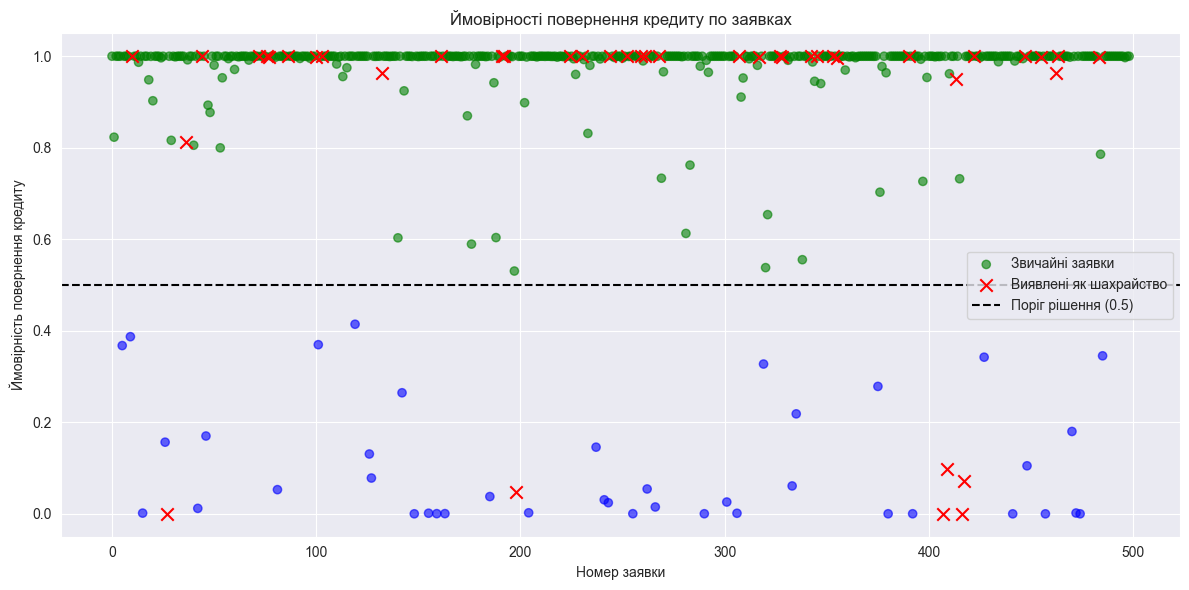

In [463]:
# побудувати графік, який показує розподіл ймовірностей повернення кредиту та пряму що відокремлює надавання/не надавання кредиту
import matplotlib.pyplot as plt
import seaborn as sns

# Побудова графіка
# Побудова графіка розсіювання
plt.figure(figsize=(12, 6))

# Звичайні заявки (не fraud)
non_fraud = sample_data[sample_data['fraud'] == 0]
plt.scatter(non_fraud.index, non_fraud['predicted_proba'],
            c=non_fraud['predicted'].map({1: 'green', 0: 'blue'}),
            label='Звичайні заявки', alpha=0.6)

# Шахрайські заявки
fraud = sample_data[sample_data['fraud'] == 1]
plt.scatter(fraud.index, fraud['predicted_proba'],
            c='red', label='Виявлені як шахрайство', marker='x', s=80)

# Додаємо порогову лінію
plt.axhline(y=0.5, color='black', linestyle='--', label='Поріг рішення (0.5)')

plt.title('Ймовірності повернення кредиту по заявках')
plt.xlabel('Номер заявки')
plt.ylabel('Ймовірність повернення кредиту')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [464]:
# Зберегти результати в Excel
sample_data.to_excel('./result/sample_data_predictions.xlsx', index=False)